In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf

In [272]:
tickers = ['V', 'MA', 'HOOD','COIN']
start_date = '2024-07-01'
end_date =  '2025-07-02'

data = yf.download(tickers, start = start_date, end = end_date)['Close']
data

[*********************100%***********************]  4 of 4 completed


Ticker,COIN,HOOD,MA,V
Date,,,,
2024-07-01,233.369995,22.790001,435.050293,261.340118
2024-07-02,227.509995,22.459999,442.049103,266.294159
2024-07-03,224.940002,22.889999,445.558472,267.048615
2024-07-05,223.679993,22.680000,446.860779,268.408752
2024-07-08,220.559998,22.090000,443.629822,264.477356
...,...,...,...,...
2025-06-25,355.369995,82.750000,549.700012,345.260010
2025-06-26,375.070007,84.519997,545.809998,346.029999
2025-06-27,353.429993,83.029999,550.320007,348.609985


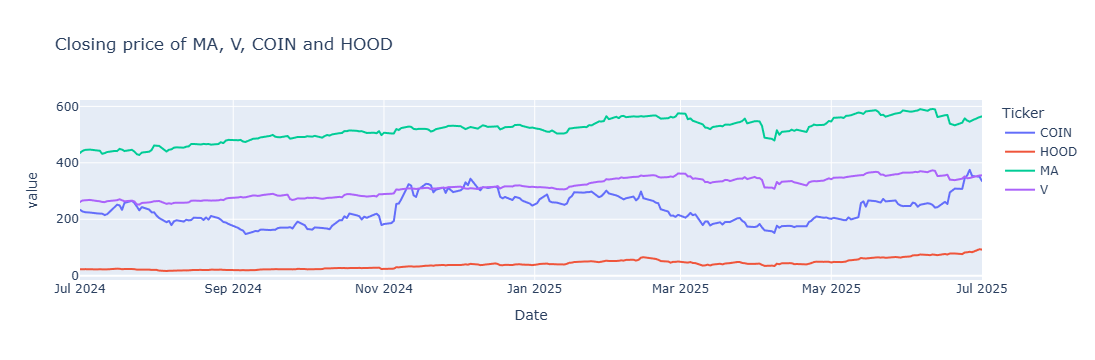

In [274]:
#visualisation of all stocks
px.line(data, title ='Closing price of MA, V, COIN and HOOD')

In [275]:
#Simple returns
simple_returns = data.pct_change()
simple_returns = simple_returns.dropna()
simple_returns

Ticker,COIN,HOOD,MA,V
Date,,,,
2024-07-02,-0.025110,-0.014480,0.016087,0.018956
2024-07-03,-0.011296,0.019145,0.007939,0.002833
2024-07-05,-0.005602,-0.009174,0.002923,0.005093
2024-07-08,-0.013948,-0.026014,-0.007230,-0.014647
2024-07-09,-0.002675,0.023087,-0.001975,-0.003604
...,...,...,...,...
2025-06-25,0.030596,0.009023,-0.014044,-0.018116
2025-06-26,0.055435,0.021390,-0.007077,0.002230
2025-06-27,-0.057696,-0.017629,0.008263,0.007456


In [276]:
#log returns
log_returns= np.log(data/data.shift(1))
log_returns= log_returns.dropna()
log_returns

Ticker,COIN,HOOD,MA,V
Date,,,,
2024-07-02,-0.025431,-0.014586,0.015959,0.018779
2024-07-03,-0.011360,0.018964,0.007908,0.002829
2024-07-05,-0.005617,-0.009217,0.002919,0.005080
2024-07-08,-0.014047,-0.026358,-0.007257,-0.014755
2024-07-09,-0.002679,0.022825,-0.001977,-0.003610
...,...,...,...,...
2025-06-25,0.030137,0.008983,-0.014144,-0.018282
2025-06-26,0.053953,0.021164,-0.007102,0.002228
2025-06-27,-0.059427,-0.017786,0.008229,0.007428


In [277]:
#Portfolio Returns
weights = np.array([2/4,1/4,.5/4,.5/4])
portfolio_simple_returns = simple_returns.dot(weights)
portfolio_simple_returns

Date
2024-07-02   -0.011795
2024-07-03    0.000485
2024-07-05   -0.004092
2024-07-08   -0.016212
2024-07-09    0.003737
                ...   
2025-06-25    0.013534
2025-06-26    0.032459
2025-06-27   -0.031290
2025-06-30    0.032705
2025-07-01   -0.024356
Length: 250, dtype: float64

In [278]:
#Portfolio Log Returns
weights = np.array([2/4,1/4,.5/4,.5/4])
portfolio_log_returns = log_returns.dot(weights)
portfolio_log_returns

Date
2024-07-02   -0.012020
2024-07-03    0.000403
2024-07-05   -0.004113
2024-07-08   -0.016364
2024-07-09    0.003669
                ...   
2025-06-25    0.013261
2025-06-26    0.031658
2025-06-27   -0.032203
2025-06-30    0.030761
2025-07-01   -0.024864
Length: 250, dtype: float64

In [279]:
#Annualized simple returns of the portfolio
annualized_simple_returns = ((1+ portfolio_simple_returns.mean()) ** 252) - 1
annualized_simple_returns

1.3863826896491185

In [280]:
#Annualized log returns of the portfolio
annualized_log_returns = portfolio_log_returns.mean() * 252
annualized_log_returns

0.606859587673537

In [281]:
#Volatility of the portfolio
daily_volatility = np.std(portfolio_simple_returns)
annual_volatility = daily_volatility*np.sqrt(252)
annual_volatility

0.6172427563772604

In [282]:
#Simple returns for SPY
benchmark = yf.download('^GSPC', start = start_date, end = end_date)['Close']

#Simple returns of S&P 500
benchmark = benchmark.pct_change() 
benchmark = benchmark.dropna()

benchmark

[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC
Date,
2024-07-02,0.006195
2024-07-03,0.005084
2024-07-05,0.005449
2024-07-08,0.001017
2024-07-09,0.000741
...,...
2025-06-25,-0.000003
2025-06-26,0.008020
2025-06-27,0.005219


In [283]:
portfolio_returns = portfolio_simple_returns.to_numpy().flatten()

In [284]:
benchmark = benchmark.to_numpy().flatten()

In [285]:
covariance_matrix = np.cov(portfolio_returns, benchmark)
covariance_matrix

array([[0.00151793, 0.00032502],
       [0.00032502, 0.00015732]])

In [286]:
#Beta of the portfolio
beta = covariance_matrix[0,1]/covariance_matrix[1,1]
beta

2.0659647197838713

In [287]:
#Alpha of the portfolio
rfr = 0.0435
alpha = (np.mean(portfolio_simple_returns) - (rfr/252))- beta* (np.mean(benchmark) - (rfr/252))
alpha = alpha*252
alpha

0.6187833634183526

In [288]:
#Downside deviation of the portfolio
negative_returns = portfolio_simple_returns[portfolio_simple_returns<0]
downside_deviation = np.std(negative_returns)
downside_deviation = downside_deviation* np.sqrt(252)
downside_deviation

0.36539541540058346

In [289]:
#Sharpe ratio of the portfolio
sharpe_ratio = ((annualized_simple_returns) - rfr)/annual_volatility
sharpe_ratio

2.1756151461878717

In [290]:
#Sortino ratio of the portfolio
sortino_ratio = (annualized_simple_returns - rfr)/downside_deviation
sortino_ratio

3.6751492576252343

In [291]:
#Maximum drawdown 
cumulative_simple_returns = ((1 + portfolio_simple_returns).cumprod())
max_drawdown = ((cumulative_simple_returns.cummax() - cumulative_simple_returns)/cumulative_simple_returns.cummax()).max()
max_drawdown

0.40554848633647106

In [292]:
cumulative_simple_returns = ((1 + portfolio_simple_returns).prod()) - 1
cumulative_simple_returns

0.9700541979661761

In [293]:
#Calmar Ratio
calmar_ratio = annualized_simple_returns/max_drawdown
calmar_ratio

3.4185374532476485

In [294]:
# Treynor Ratio of the portfolio
treynor_ratio = (annualized_simple_returns - rfr)/beta
treynor_ratio

0.6500027211450168

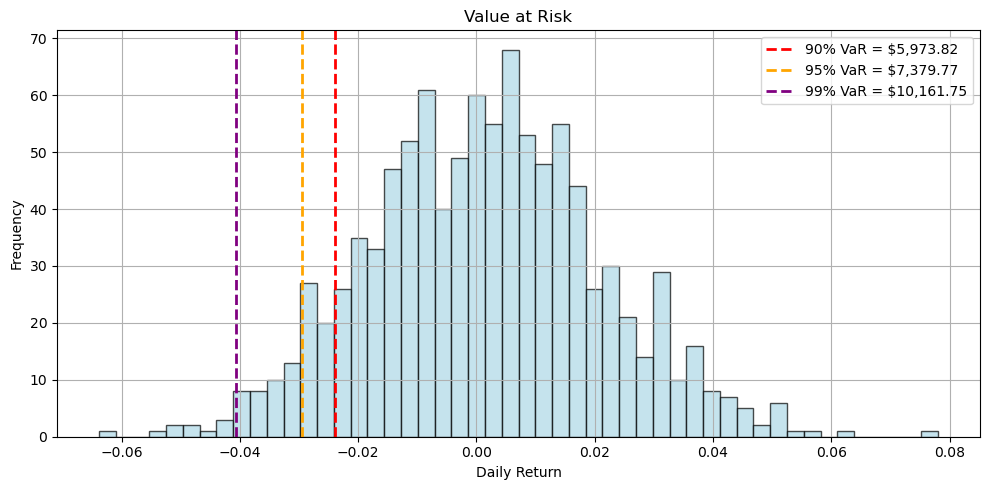

In [295]:
# simulating portfolio returns
np.random.seed(42)
portfolio_simple_returns = np.random.normal(0.001, 0.02, 1000)

# Portfolio value
portfolio_value = 250000

# VaR percentiles (in return terms)
var_90_return = np.percentile(portfolio_simple_returns, 10)
var_95_return = np.percentile(portfolio_simple_returns, 5)
var_99_return = np.percentile(portfolio_simple_returns, 1)

# VaR in dollars var_90 = -var_90_return * portfolio_value
var_95 = -var_95_return * portfolio_value
var_99 = -var_99_return * portfolio_value

# histogram of returns
plt.figure(figsize=(10, 5))
plt.hist(portfolio_simple_returns, bins=50, color='lightblue', edgecolor='black', alpha=0.7)

# VaR lines (on return scale)
plt.axvline(var_90_return, color='red', linestyle='--', linewidth=2, label=f'90% VaR = ${var_90:,.2f}')
plt.axvline(var_95_return, color='orange', linestyle='--', linewidth=2, label=f'95% VaR = ${var_95:,.2f}')
plt.axvline(var_99_return, color='purple', linestyle='--', linewidth=2, label=f'99% VaR = ${var_99:,.2f}')

# Labels and legend
plt.title('Value at Risk')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [296]:
#Expected Shortfall/Conditional VaR for the portfolio at 90% VaR
c_var_90 = portfolio_simple_returns[portfolio_simple_returns <= np.percentile(portfolio_simple_returns, 10)].mean()
c_var_90 = c_var_90*portfolio_value
c_var_90

-8033.154905384898

In [297]:
#Expected Shortfall/Conditional VaR for the portfolio at 95% VaR
c_var_95 = portfolio_simple_returns[portfolio_simple_returns <= np.percentile(portfolio_simple_returns, 5)].mean()
c_var_95 = c_var_95*portfolio_value
c_var_95

-9384.99233682123

In [299]:
#Expected Shortfall/Conditional VaR for the portfolio at 99% VaR
c_var_99 = portfolio_simple_returns[portfolio_simple_returns <= np.percentile(portfolio_simple_returns, 1)].mean()
c_var_99 = c_var_99*portfolio_value
c_var_99

-12220.075438461503